<a href="https://colab.research.google.com/github/nfierroflo/Evolutionary-computation/blob/main/evolutivacompletoc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
A=0.18
t0=33.941
gamma=18.975
beta=0.666
tfall=40.076
trise=13.416

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
import csv

#guardar
from csv import writer  #para guardar datos
def GuardarDatos(datasave,filename):
  with open(filename,'a') as file:
    writer_object=writer(file);
    writer_object.writerow(datasave);

## late

In [4]:
fnc1 = lambda t:(A*(1-beta)*np.exp(-(t-(gamma+t0))/tfall)/(1+np.exp(-(t-t0)/trise)))

## early

In [5]:
fnc2 = lambda t:(A*(1-beta*(t-t0)/gamma)/(1+np.exp(-(t-t0)/trise)))

## guardar Datos

In [6]:
import math

def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [7]:
def plotResult(x,y,r1, r2, r3,title1=' '):
  plt.plot(x,y,'--',label='Train signal')
  plt.plot(t,r1,label='Run 0')
  plt.plot(t,r2,label='Run 1')
  plt.plot(t,r3,label='Run 2')
  plt.legend()
  plt.title('start:'+title1)
  plt.grid()

def plotFitness(epoch,f1, f2, f3,title1=''):
  plt.plot(epoch,f1,label='Run 0')
  plt.plot(epoch,f2,label='Run 1')
  plt.plot(epoch,f3,label='Run 2')
  plt.legend()
  plt.title('Fitness :'+title1)
  plt.grid()


In [8]:
def LeerArchivo(base):
  misdatos=pd.read_csv(base,sep='\t',header=None);
  gene_=(misdatos.loc[:,0]).values.tolist();
  fit_=(misdatos.loc[:,1]).values.tolist();

  
  
  return gene_, fit_ 

In [36]:
g0=lambda x: 
g1=lambda x:
g2=lambda x: 

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

SyntaxError: ignored

## cambio de conjunto de entrenamiento

In [9]:
import numpy as np
limitInner = [-20, 20]
n_train = 20
t1=np.linspace(*limitInner,n_train)

limitInner = [21, 80]
n_train = 60
t2=np.linspace(*limitInner,n_train)

limitInner = [81, 100]
n_train = 10
t3=np.linspace(*limitInner,n_train)
t=np.concatenate((t1,t2,t3))

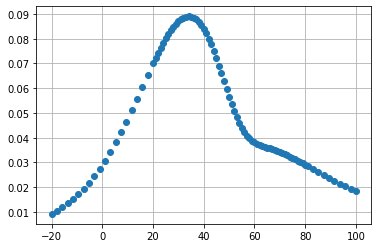

In [10]:
ylate=fnc1(t)
yearly=fnc2(t)
aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
Totalv3=yearly*(1-gt)+ylate*gt
plt.plot(t,Totalv3,'o')
plt.grid()

In [11]:
for i in range(len(t)):
  c=t[i]
  data=[c,Totalv3[i]]
  GuardarDatos(data,'TrainTotalv3.txt')

In [ ]:
g0=lambda x: 
g1=lambda x:
g2=lambda x: 

plotResult(t,Totalv3,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

## Data original

COn log cosh

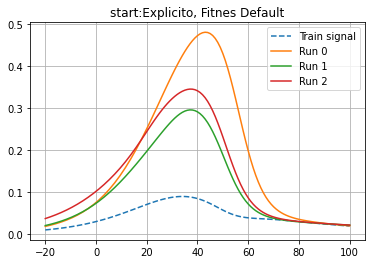

In [12]:
g0=lambda x: (0.609*(1-0.319*(x-57.9)/34.10)/(1+np.exp((30.2-x)/12.33)))*(1-sigmoid(0.2*(x-(01.78+53.9))))+(sigmoid(0.2*(x-(12.73+39.5))))*(0.199*(1-0.397)*np.exp((11.18+34.8-x)/31.00)/(1+np.exp((54.6-x)/20.64)))

g1=lambda x: (0.296*(1-0.869*(x-54.2)/68.11)/(1+np.exp((22.6-x)/12.73)))*(1-sigmoid(0.2*(x-(11.31+39.1))))+(sigmoid(0.2*(x-(06.75+24.7))))*(0.616*(1-0.863)*np.exp((26.57+20.9-x)/65.73)/(1+np.exp((37.0-49.38)/70.93)))
g2=lambda x: (0.406*(1-0.376*(x-59.9)/62.11)/(1+np.exp((24.3-x)/16.12)))*(1-sigmoid(0.2*(x-(13.26+37.3))))+(sigmoid(0.2*(x-(00.44+20.7))))*(0.400*(1-0.916)*np.exp((59.04+25.3-x)/49.85)/(1+np.exp((24.1-x)/45.08)))

plotResult(t,Totalv3,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

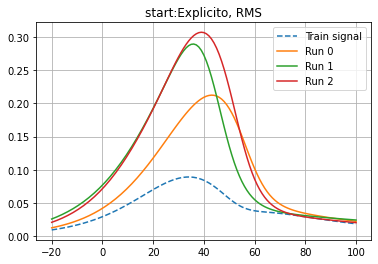

In [13]:
g0=lambda x: (0.277*(1-0.183*(x-56.0)/06.89)/(1+np.exp((37.6-x)/13.72)))*(1-sigmoid(0.2*(x-(07.13+49.8))))+(sigmoid(0.2*(x-(37.39+20.6))))*(0.149*(1-0.502)*np.exp((27.96+30.6-x)/39.03)/(1+np.exp((31.9-x)/37.11)))

g1=lambda x:(0.437*(1-0.880*(x-58.2)/72.16)/(1+np.exp((33.2-x)/15.31)))*(1-sigmoid(0.2*(x-(08.98+35.8))))+(sigmoid(0.2*(x-(09.16+24.5))))*(0.212*(1-0.367)*np.exp((41.96+30.6-x)/85.31)/(1+np.exp((31.4-18.16)/11.94)))
g2=lambda x: (0.332*(1-0.427*(x-57.7)/35.47)/(1+np.exp((26.2-x)/13.56)))*(1-sigmoid(0.2*(x-(04.96+47.1))))+(sigmoid(0.2*(x-(07.11+22.6))))*(0.490*(1-0.832)*np.exp((14.46+28.6-x)/44.60)/(1+np.exp((45.1-x)/28.00)))

plotResult(t,Totalv3,g0(t),g1(t), g2(t),'Explicito, RMS')

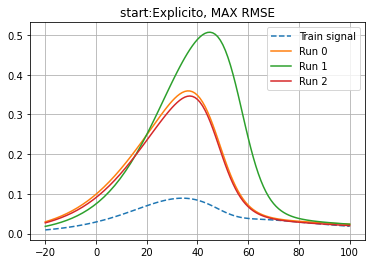

In [14]:
g0=lambda x: (0.411*(1-0.302*(x-56.8)/37.12)/(1+np.exp((22.5-x)/13.84)))*(1-sigmoid(0.2*(x-(16.67+31.6))))+(sigmoid(0.2*(x-(01.35+29.5))))*(0.926*(1-0.943)*np.exp((39.52+37.3-x)/59.00)/(1+np.exp((40.8-x)/89.37)))
g1=lambda x: (0.701*(1-0.099*(x-48.5)/11.11)/(1+np.exp((31.6-x)/12.53)))*(1-sigmoid(0.2*(x-(33.50+23.5))))+(sigmoid(0.2*(x-(01.50+48.4))))*(0.051*(1-0.456)*np.exp((42.62+48.8-x)/54.69)/(1+np.exp((27.3-x)/15.20)))
g2=lambda x: (0.428*(1-0.505*(x-59.5)/50.94)/(1+np.exp((26.1-x)/13.93)))*(1-sigmoid(0.2*(x-(05.51+42.0))))+(sigmoid(0.2*(x-(12.51+24.3))))*(0.711*(1-0.892)*np.exp((06.15+41.8-x)/45.87)/(1+np.exp((31.6-x)/47.46)))

plotResult(t,Totalv3,g0(t),g1(t), g2(t),'Explicito, MAX RMSE')

## aData multiplicado por 100

## Cconstates libres (semi)

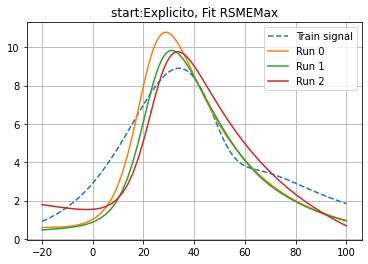

In [11]:
g0=lambda x: (0.56*(1-0.60*(x-55.4)/86.55)/(1+np.exp((24.5-39.84)/20.37)))*(1-sigmoid(0.2*(x-(03.33+37.3))))+sigmoid(0.2*(x-(01.33+20.1)))*(0.45*(1-0.39)*np.exp((87.95+59.9-x)/27.57)/(1+np.exp((58.2-82.05)/49.22)))
g1=lambda x: (0.68*(1-0.65*(x-49.5)/08.47)/(1+np.exp((51.5-x)/33.67)))*(1-sigmoid(0.2*(x-(07.97+53.6))))+sigmoid(0.2*(x-(01.62+21.9)))*(0.69*(1-0.29)*np.exp((96.81+29.4-x)/24.50)/(1+np.exp((40.2-x)/90.74)))
g2=lambda x: (0.89*(1-0.83*(x-37.0)/21.94)/(1+np.exp((41.1-61.87)/37.24)))*(1-sigmoid(0.2*(x-(71.99+55.8))))+sigmoid(0.2*(x-(03.66+21.7)))*(0.99*(1-0.23)*np.exp((90.29+59.2-x)/33.10)/(1+np.exp((58.0-38.60)/69.57)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fit RSMEMax')

Text(0.5, 0, 'Generacion')

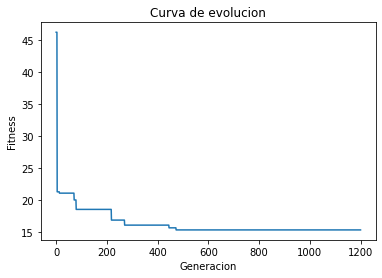

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

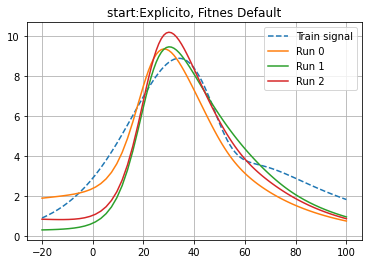

In [12]:
# a umeto poblacion a 500, modificacion de genotipo para evitar 0 al inicio
g0=lambda x: (0.347*(1-0.980*(x-59.3)/03.11)/(1+np.exp((38.1-x)/43.91)))*(1-sigmoid(0.2*(x-(19.98+29.9))))+(sigmoid(0.2*(x-(00.93+20.2))))*(0.970*(1-0.612)*np.exp((83.26+42.0-x)/28.37)/(1+np.exp((52.6-98.74)/28.49)))
g1=lambda x: (0.641*(1-0.716*(x-26.5)/57.83)/(1+np.exp((28.4-x)/60.04)))*(1-sigmoid(0.2*(x-(45.89+26.6))))+(sigmoid(0.2*(x-(01.28+20.2))))*(0.529*(1-0.291)*np.exp((68.94+57.5-x)/23.83)/(1+np.exp((29.2-x)/40.05)))
g2=lambda x: (0.573*(1-0.357*(x-28.8)/05.06)/(1+np.exp((36.0-x)/79.81)))*(1-sigmoid(0.2*(x-(12.12+47.8))))+(sigmoid(0.2*(x-(02.90+20.0))))*(0.811*(1-0.385)*np.exp((92.41+31.1-x)/23.39)/(1+np.exp((46.0-x)/88.84)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

Text(0.5, 0, 'Generacion')

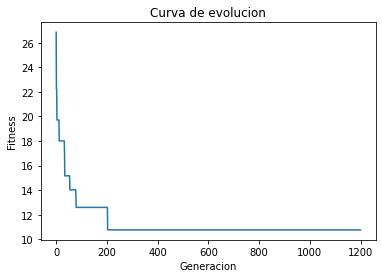

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

## en carpeta semifree

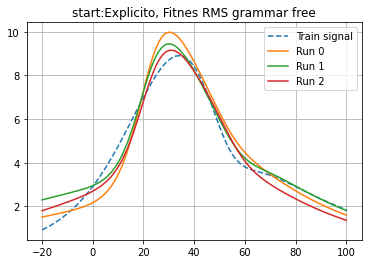

In [13]:
# rems 500 individuos elimisto 0.1, mutacion 0.3 RMS 
g0=lambda x: (0.863*(1-0.578*(x-49.8)/03.27)/(1+np.exp((38.3-x)/30.72)))*(1-sigmoid(0.2*(x-(23.82+31.5))))+(sigmoid(0.2*(x-(00.52+20.9))))*(0.957*(1-0.074)*np.exp((89.49+42.1-x)/32.43)/(1+np.exp((35.9-x)/84.33)))
g1=lambda x: (0.954*(1-0.954*(x-46.0)/04.89)/(1+np.exp((27.6-x)/30.39)))*(1-sigmoid(0.2*(x-(12.30+46.5))))+(sigmoid(0.2*(x-(00.29+20.3))))*(0.978*(1-0.271)*np.exp((84.85+51.5-x)/33.63)/(1+np.exp((28.9-x)/39.27)))
g2=lambda x: (0.830*(1-0.830*(x-58.1)/04.55)/(1+np.exp((27.4-x)/26.31)))*(1-sigmoid(0.2*(x-(28.35+28.5))))+(sigmoid(0.2*(x-(00.59+20.9))))*(0.934*(1-0.042)*np.exp((83.68+37.5-x)/29.02)/(1+np.exp((54.1-x)/45.40)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes RMS grammar free')

Text(0.5, 0, 'Generacion')

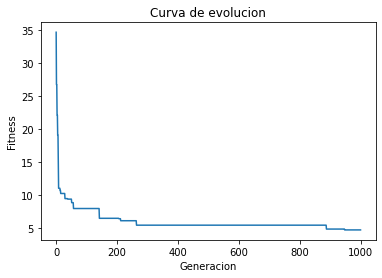

In [20]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

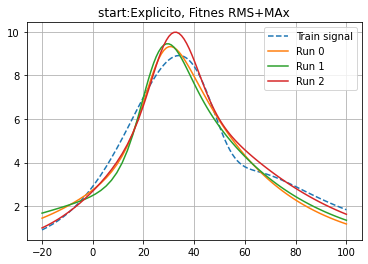

In [20]:
# CON MAX +RMS
g0=lambda x: (0.493*(1-0.796*(x-58.6)/01.02)/(1+np.exp((43.6-x)/21.16)))*(1-sigmoid(0.2*(x-(00.62+27.4))))+(sigmoid(0.2*(x-(04.89+20.8))))*(0.802*(1-0.034)*np.exp((88.11+32.1-x)/27.33)/(1+np.exp((23.2-x)/76.35)))
g1=lambda x: (0.643*(1-0.553*(x-57.9)/02.89)/(1+np.exp((23.5-x)/26.74)))*(1-sigmoid(0.2*(x-(07.27+28.3))))+(sigmoid(0.2*(x-(01.34+21.0))))*(0.747*(1-0.080)*np.exp((75.54+52.6-x)/29.28)/(1+np.exp((34.9-x)/57.37)))
g2=lambda x: (0.513*(1-0.971*(x-56.6)/02.13)/(1+np.exp((20.5-x)/14.21)))*(1-sigmoid(0.2*(x-(18.58+23.7))))+(sigmoid(0.2*(x-(00.64+25.4))))*(0.825*(1-0.059)*np.exp((91.29+36.5-x)/29.89)/(1+np.exp((43.8-x)/35.35)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes RMS+MAx')

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

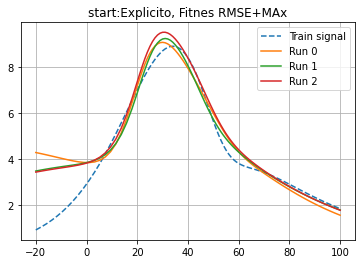

In [21]:
# conjunto ebtrenamiento 0
g0=lambda x: (0.289*(1-0.944*(x-55.1)/01.85)/(1+np.exp((22.2-x)/83.77)))*(1-sigmoid(0.2*(x-(03.83+53.5))))+(sigmoid(0.2*(x-(00.17+20.2))))*(0.882*(1-0.365)*np.exp((82.47+53.5-x)/32.71)/(1+np.exp((22.5-x)/30.64)))
g1=lambda x: (0.829*(1-0.876*(x-55.1)/03.38)/(1+np.exp((37.8-x)/42.62)))*(1-sigmoid(0.2*(x-(03.58+44.2))))+(sigmoid(0.2*(x-(01.54+21.2))))*(0.976*(1-0.011)*np.exp((82.70+55.6-x)/35.98)/(1+np.exp((57.8-x)/74.74)))
g2=lambda x: (0.906*(1-0.716*(x-59.4)/04.13)/(1+np.exp((25.1-x)/42.33)))*(1-sigmoid(0.2*(x-(24.40+26.0))))+(sigmoid(0.2*(x-(00.23+21.2))))*(0.781*(1-0.381)*np.exp((97.85+59.2-x)/34.88)/(1+np.exp((47.4-x)/57.27)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes RMSE+MAx')

## con log cos

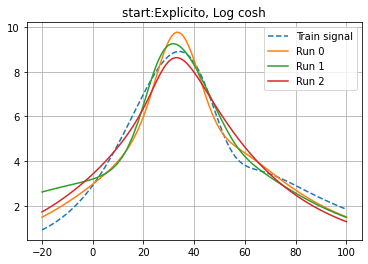

In [25]:
g0=lambda x: (0.952*(1-0.649*(x-40.4)/01.29)/(1+np.exp((31.4-x)/17.43)))*(1-sigmoid(0.2*(x-(07.01+40.4))))+(sigmoid(0.2*(x-(02.26+26.3))))*(0.807*(1-0.117)*np.exp((87.29+47.7-x)/29.68)/(1+np.exp((40.6-x)/97.93)))
g1=lambda x: (0.297*(1-0.638*(x-55.3)/01.03)/(1+np.exp((29.8-x)/33.53)))*(1-sigmoid(0.2*(x-(25.88+28.9))))+(sigmoid(0.2*(x-(00.87+22.1))))*(0.654*(1-0.266)*np.exp((89.14+51.0-x)/29.54)/(1+np.exp((43.7-x)/42.08)))
g2=lambda x: (0.923*(1-0.804*(x-58.5)/02.13)/(1+np.exp((32.2-x)/19.08)))*(1-sigmoid(0.2*(x-(02.35+20.4))))+(sigmoid(0.2*(x-(00.90+25.3))))*(0.715*(1-0.072)*np.exp((93.42+30.1-x)/26.78)/(1+np.exp((29.1-x)/49.75)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Log cosh')

## RMSE

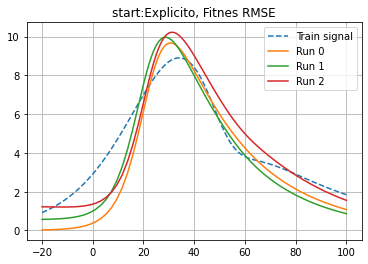

In [ ]:
g0=lambda x: (0.253*(1-0.297*(90.69-36.8)/34.97)/(1+np.exp((31.4-x)/23.24)))*(1-sigmoid(0.2*(x-(02.38+48.9))))+sigmoid(0.2*(x-(01.65+21.1)))*(0.752*(1-0.118)*np.exp((91.32+29.9-x)/29.19)/(1+np.exp((32.5-96.95)/49.74)))
g1=lambda x: (0.803*(1-0.784*(x-45.5)/43.44)/(1+np.exp((48.6-x)/88.39)))*(1-sigmoid(0.2*(x-(02.88+51.8))))+sigmoid(0.2*(x-(00.37+20.6)))*(0.764*(1-0.378)*np.exp((86.17+38.1-x)/23.84)/(1+np.exp((47.7-x)/79.57)))
g2=lambda x: (0.274*(1-0.878*(x-44.0)/04.56)/(1+np.exp((20.1-x)/57.33)))*(1-sigmoid(0.2*(x-(02.88+56.1))))+sigmoid(0.2*(x-(01.39+21.0)))*(0.992*(1-0.626)*np.exp((95.14+54.0-x)/26.92)/(1+np.exp((58.3-x)/57.17)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes RMSE')

Text(0.5, 0, 'Generacion')

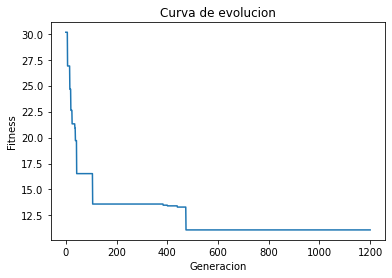

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

## Fitnes default

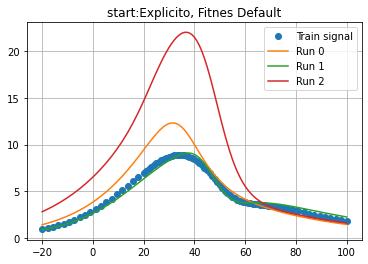

In [ ]:
#Pmut 0.3, pcros 0.9, individuos 100, generacion 1000 elitismo 0.1
g0=lambda x: (13.416*(1-0.666*(0.18-51.8)/13.416)/(1+np.exp((46.3-x)/18.975)))*(1-sigmoid(0.2*(x-(0.18+36.6))))+sigmoid(0.2*(x-(0.18+40.1)))*(33.941*(1-0.666)*np.exp((13.416+37.9-x)/40.076)/(1+np.exp((49.8-40.076)/33.941)))
g1=lambda x: (0.666*(1-33.941*(x-50.3)/18.975)/(1+np.exp((41.5-x)/13.416)))*(1-sigmoid(0.2*(x-(13.416+36.7))))+sigmoid(0.2*(x-(0.18+39.2)))*(13.416*(1-0.666)*np.exp((40.076+38.5-x)/40.076)/(1+np.exp((28.7-x)/40.076)))
g2=lambda x: (33.941*(1-0.18*(x-56.2)/13.416)/(1+np.exp((39.9-x)/18.975)))*(1-sigmoid(0.2*(x-(13.416+34.3))))+sigmoid(0.2*(x-(0.666+22.1)))*(33.941*(1-0.666)*np.exp((0.666+21.5-x)/40.076)/(1+np.exp((29.9-x)/18.975)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

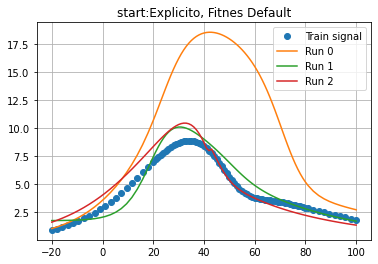

In [ ]:
# aumento prob mutacion 0.6, individuos 100 generacion 1000
g0=lambda x: (13.416*(1-0.666*(x-54.1)/40.076)/(1+np.exp((24.6-x)/13.416)))*(1-sigmoid(0.2*(x-(33.941+38.4))))+sigmoid(0.2*(x-(0.666+24.0)))*(13.416*(1-0.18)*np.exp((0.18+52.2-x)/40.076)/(1+np.exp((51.4-x)/33.941)))
g1=lambda x: (0.18*(1-0.666*(18.975-58.7)/0.666)/(1+np.exp((58.5-18.975)/33.941)))*(1-sigmoid(0.2*(x-(0.18+51.8))))+sigmoid(0.2*(x-(0.18+20.7)))*(18.975*(1-0.666)*np.exp((40.076+59.6-x)/40.076)/(1+np.exp((33.9-0.18)/33.941)))
g2=lambda x: (0.666*(1-18.975*(0.666-53.9)/33.941)/(1+np.exp((26.7-x)/18.975)))*(1-sigmoid(0.2*(x-(13.416+29.4))))+sigmoid(0.2*(x-(18.975+31.1)))*(18.975*(1-0.666)*np.exp((0.18+37.7-x)/40.076)/(1+np.exp((42.1-x)/0.18)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

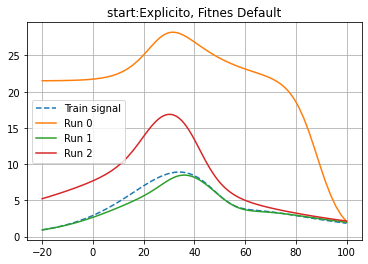

In [ ]:
# aumento a 200 individuos 1200 generaciones pmut 0.6 pcross 0.9
g0=lambda x: (18.975*(1-0.18*(0.666-30.3)/40.076)/(1+np.exp((26.5-40.076)/0.18)))*(1-sigmoid(0.2*(x-(33.941+54.5))))+sigmoid(0.2*(x-(0.666+26.2)))*(13.416*(1-0.18)*np.exp((13.416+28.6-x)/13.416)/(1+np.exp((46.8-x)/33.941)))
g1=lambda x: (0.18*(1-33.941*(x-53.5)/18.975)/(1+np.exp((23.1-x)/13.416)))*(1-sigmoid(0.2*(x-(18.975+36.4))))+sigmoid(0.2*(x-(0.666+29.4)))*(13.416*(1-0.666)*np.exp((33.941+46.9-x)/33.941)/(1+np.exp((58.6-x)/33.941)))
g2=lambda x: (18.975*(1-0.666*(18.975-27.1)/18.975)/(1+np.exp((32.1-x)/40.076)))*(1-sigmoid(0.2*(x-(0.666+40.0))))+sigmoid(0.2*(x-(0.666+20.6)))*(13.416*(1-0.666)*np.exp((18.975+57.6-x)/40.076)/(1+np.exp((27.9-x)/40.076)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

## con RMS como fitness

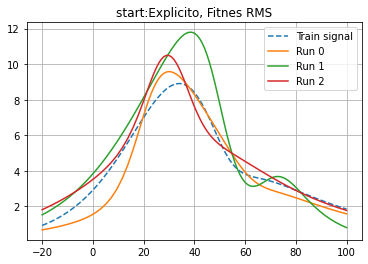

In [ ]:
g0=lambda x: (0.18*(1-33.941*(x-54.5)/40.076)/(1+np.exp((33.2-x)/18.975)))*(1-sigmoid(0.2*(x-(13.416+50.0))))+sigmoid(0.2*(x-(0.666+20.2)))*(33.941*(1-0.18)*np.exp((0.18+32.5-x)/40.076)/(1+np.exp((55.8-40.076)/18.975)))
g1=lambda x: (33.941*(1-0.666*(0.666-29.1)/40.076)/(1+np.exp((27.9-x)/18.975)))*(1-sigmoid(0.2*(x-(0.666+48.7))))+sigmoid(0.2*(x-(33.941+37.3)))*(40.076*(1-0.666)*np.exp((18.975+43.4-x)/13.416)/(1+np.exp((39.3-40.076)/0.18)))
g2=lambda x: (0.666*(1-40.076*(x-40.1)/13.416)/(1+np.exp((59.4-x)/18.975)))*(1-sigmoid(0.2*(x-(13.416+25.0))))+sigmoid(0.2*(x-(0.666+24.3)))*(13.416*(1-0.18)*np.exp((40.076+23.4-x)/40.076)/(1+np.exp((32.8-18.975)/33.941)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes RMS')

## con crorrelacion

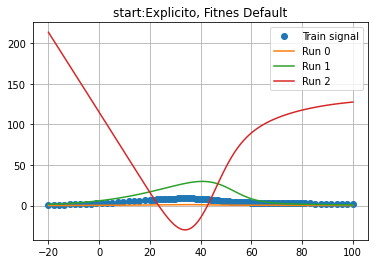

In [ ]:
g0=lambda x: (0.18*(1-13.416*(13.416-33.2)/18.975)/(1+np.exp((34.6-x)/18.975)))*(1-sigmoid(0.2*(x-(18.975+25.1))))+sigmoid(0.2*(x-(18.975+35.0)))*(18.975*(1-0.18)*np.exp((0.18+36.3-x)/33.941)/(1+np.exp((36.2-0.666)/13.416)))
g1=lambda x: (40.076*(1-0.18*(x-41.4)/18.975)/(1+np.exp((28.5-x)/13.416)))*(1-sigmoid(0.2*(x-(0.666+51.9))))+sigmoid(0.2*(x-(0.666+36.4)))*(18.975*(1-0.666)*np.exp((18.975+50.4-x)/33.941)/(1+np.exp((41.9-33.941)/13.416)))
g2=lambda x: (40.076*(1-13.416*(x-20.4)/40.076)/(1+np.exp((58.6-40.076)/33.941)))*(1-sigmoid(0.2*(x-(0.18+37.2))))+sigmoid(0.2*(x-(0.666+45.0)))*(40.076*(1-0.18)*np.exp((33.941+32.6-18.975)/33.941)/(1+np.exp((41.7-x)/18.975)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')

Text(0.5, 0, 'Generacion')

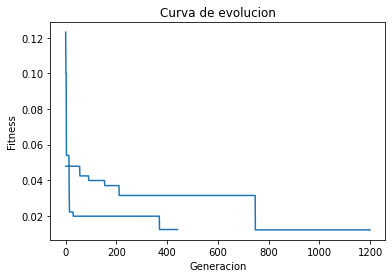

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

## Fitnes RMSE + max

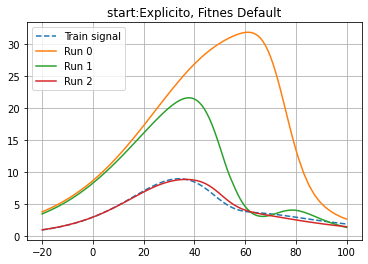

In [ ]:
g0=lambda x: (40.076*(1-0.18*(x-59.6)/13.416)/(1+np.exp((37.9-x)/18.975)))*(1-sigmoid(0.2*(x-(40.076+35.7))))+sigmoid(0.2*(x-(40.076+27.3)))*(40.076*(1-0.666)*np.exp((18.975+54.7-x)/18.975)/(1+np.exp((58.4-x)/40.076)))
g1=lambda x: (18.975*(1-0.666*(0.666-44.6)/40.076)/(1+np.exp((20.8-x)/18.975)))*(1-sigmoid(0.2*(x-(13.416+36.9))))+sigmoid(0.2*(x-(33.941+42.6)))*(13.416*(1-0.666)*np.exp((40.076+43.5-x)/13.416)/(1+np.exp((54.0-x)/0.666)))
g2=lambda x: (0.666*(1-13.416*(x-57.8)/13.416)/(1+np.exp((33.8-x)/13.416)))*(1-sigmoid(0.2*(x-(0.18+51.5))))+sigmoid(0.2*(x-(13.416+31.7)))*(33.941*(1-0.666)*np.exp((0.666+29.0-x)/33.941)/(1+np.exp((24.2-x)/13.416)))

plotResult(t,Totalv2,g0(t),g1(t), g2(t),'Explicito, Fitnes Default')
#plt.plot(t,g0(t))

Text(0.5, 0, 'Generacion')

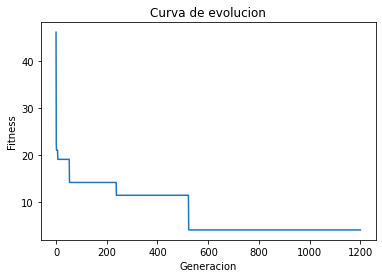

In [ ]:
base='progress_report.csv'
generacion, minfit=LeerArchivo(base)
plt.plot(generacion, minfit)
plt.title('Curva de evolucion')
plt.ylabel('Fitness')
plt.xlabel('Generacion')

## Pruebas hasta el Avance 3, solo serviria de guia

## COn distacia d en fitness

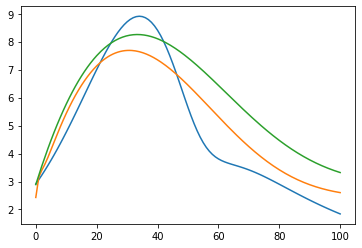

In [ ]:
g0=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g1=lambda x: 3.82+((((np.exp(x))+(x))-(np.exp(x)))/(np.exp(2.03)))+(np.exp(-(((np.exp(3.15))/(np.exp(-(x))))+(1.67))))
g2=lambda x: 0.01+(np.exp(-(9.03)))+((8.90)/(np.exp((np.exp(-(x)))/(x))))
g3=lambda x: 3.83+((1.50)-(np.exp(np.exp(-(x)))))+(np.exp(-((0.34)+(np.exp(-((np.exp(-(x)))*(np.exp(np.exp(4.36)))))))))
g4=lambda x: 2.43+((x)/(np.exp(np.exp((x)*(np.exp(-(3.99)))))))+((x)/(np.exp(x)))
g5=lambda x: 3.55+(((np.exp(x))+((x)-(np.exp(x))))/(6.35))+((np.exp(-(5.97)))/((x)-(0.71)))
g6=lambda x: 2.89+((x)/(np.exp((7.77)*(8.80))))+((x)/(np.exp(np.exp((7.53)*(((x)-(((x)-(x))-(3.43)))*(np.exp(-(6.13))))))))
#3.28+((0.09)/(7.73))+((x)/((np.exp(x))-((np.exp(x))-(7.26))))

plt.plot(x,y)
#plt.plot(x, g0(t))
#plt.plot(x, g1(t))
#plt.plot(x, g2(t))
#plt.plot(x, g3(t))
plt.plot(t, g4(t))
#plt.plot(t, g5(t))
plt.plot(t, g6(t))

## Ne RMS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


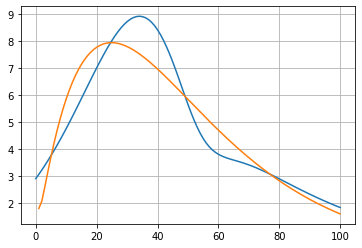

In [ ]:
plt.plot(x,y)
plt.plot(t, g0(t) )
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


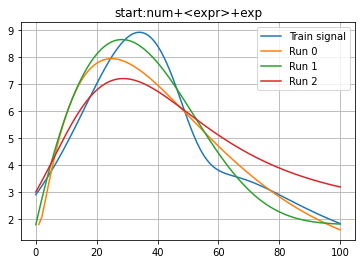

In [ ]:
g0=lambda x: 0.03+((x)/(np.exp((np.exp(-(0.90)))+(((x)*(0.04))-(0.25)))))+((1.91)/((x)+(x)))
g1=lambda x: 2.80+((np.exp(-(np.exp(-(((3.51)-((x)/(4.04)))/(9.96))))))*(x))+((np.exp(-(8.53)))-(np.exp(-(np.exp(-(8.30))))))
g2=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+<expr>+exp')

## New genotype con value+exp+exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


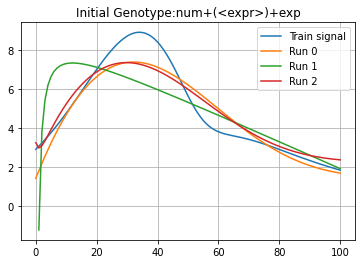

In [ ]:
g0=lambda x:1.42+((np.exp(-(np.exp(-(((3.95)-(x))/((np.exp(3.97))+(np.exp((1.57)/(x)))))))))*(x))+(np.exp(-((x)+((9.71)/(x)))))
g1=lambda x: 1.57+(1.69)+(np.exp(-((np.exp(-((np.exp(4.03))-(x))))-((1.16)+((((x)/(8.99))+((3.27)*(x)))/(np.exp(6.64)))))))
g2=lambda x: 2.25+((np.exp(-(np.exp((x)/(np.exp(3.96))))))*(x))+(np.exp(-(x)))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g3(t), g2(t),'num+(<expr>)+exp')

# se modifio el genotipo para tene =r num+exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


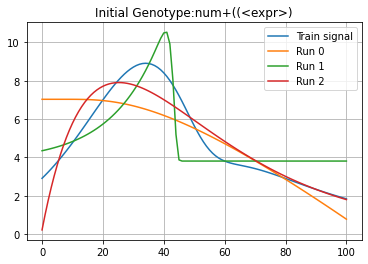

In [ ]:
g0=lambda x: 7.03+(((5.69)-(x))*(np.exp(-((2.05)+(((3.84)/(x))/(np.exp(-(2.85))))))))
g1=lambda x: 3.81+(np.exp(-(((np.exp(-(np.exp(3.77))))*(np.exp(x)))+(((0.62)-((x)/((2.47)-(1.53))))+(x)))))
g2=lambda x: 0.22+((x)/(np.exp((np.exp(-(3.23)))*((x)+(4.83)))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+((<expr>)')

## Datos iniciales con todo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


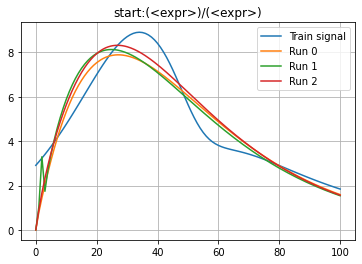

In [ ]:
g0=lambda x: (x)/((np.exp(((x)/(7.01))/(3.45)))+(np.exp(-(np.exp(np.exp(-(((x)/(1.10))*(np.exp(np.exp(-(9.94)))))))))))
g1=lambda x: (x)/(np.exp(((x)/(5.76))/((4.26)-((9.91)/(x)))))
g2=lambda x: (x)/(np.exp((x)/(np.exp((3.18)-(np.exp(-((x)/((2.28)+(6.57)))))))))

plotResult(x,y,g0(t),g1(t), g2(t),'(<expr>)/(<expr>)')

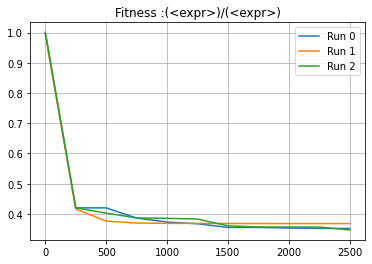

In [ ]:
epoch=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500]
fit0=[1.001, 0.42, 0.4199, 0.3862, 0.3730,  0.3674, 0.3552, 0.3552, 0.3532, 0.3519 ,0.3519]
fit1=[0.9931, 0.4163, 0.3761,  0.3698, 0.3686, 0.3686,0.3682, 0.3681, 0.3679,0.3679,0.3679  ]
fit2=[0.9997, 0.4201, 0.4025, 0.3868, 0.3854, 0.3831, 0.3605, 0.3566, 0.3566,0.3566, 0.347 ] 
plotFitness(epoch, fit0, fit1, fit2,'(<expr>)/(<expr>)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


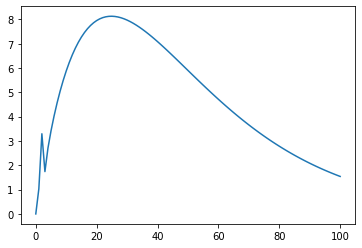

In [ ]:
plt.plot(x,g1(t),label='Run 1')

In [ ]:
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((x/np.exp(-(x))))))))))

In [ ]:
g0=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+
              (19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g1=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+
              (19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g2=lambda t: np.exp(-(np.exp(-((t/07.43)))))/((21.88+np.exp(-(np.exp(-(np.exp(-(t))))-t/37.37)))
            -np.exp(-(np.exp(-((np.exp(-(np.exp(-((np.exp(-(((t*46.67*t)/t)))/89.61)))))*t)/np.exp(-(61.88)))))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


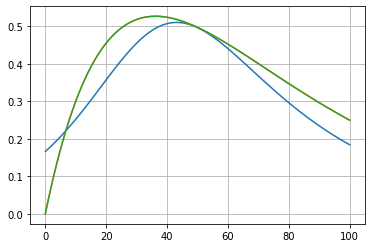

In [ ]:
plt.plot(t,fnc1(t))
plt.plot(t,g0(t)/(2e26))
plt.plot(t,g1(t)/(2e26))

plt.grid()

## datos late

## datos erly

## generar archivos